In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
import os


In [42]:
# hr = pd.read_csv()
# os.chdir('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Cases/')
hr = pd.read_csv("../datasets/HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [43]:
# hr = pd.read_csv()
x,y = hr.drop('left', axis = 1),hr['left']

In [44]:
ohe = OneHotEncoder(drop = 'first', sparse_output = False).set_output(transform = 'pandas')
col_trnf = ColumnTransformer([('OHE', ohe, make_column_selector(dtype_include = object))],
                             remainder = 'passthrough',
                             verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform = 'pandas')
x = col_trnf.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 25,stratify = y)


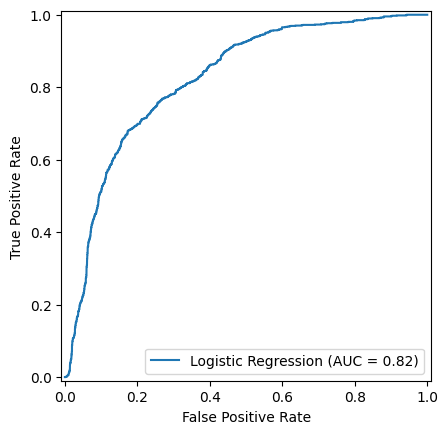

In [45]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
lr.fit(x_train, y_train)
y_pred_prob = lr.predict_proba(x_test)
fpr , tpr, thres= roc_curve(y_test, y_pred_prob[:,1])
disp = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc_score(y_test, y_pred_prob[:,1]),
                       name = 'Logistic Regression')
disp.plot()
plt.show()

In [46]:
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalties = ['l1', 'l2', 'elasticnet',None]
scores = []

for s in tqdm(solvers):
    for p in penalties:
            try:
                lr = LogisticRegression(solver=s, penalty=p)
                lr.fit(x_train, y_train)
                y_pred = lr.predict(x_test)
                y_pred_prob = lr.predict_proba(x_test)
                scores.append([s,p,roc_auc_score(y_test, y_pred_prob[:,1])])
            except:
                continue

df_acc_scores = pd.DataFrame(columns = ['Solver', 'Penalty', 'ROC AUC Score'], data = scores)
df_acc_scores.sort_values('ROC AUC Score', ascending=False)


100%|██████████| 6/6 [00:02<00:00,  2.44it/s]


,Solver,Penalty,ROC AUC Score
3,liblinear,l2,0.822314
4,newton-cg,l2,0.822297
6,newton-cholesky,l2,0.822268
5,newton-cg,None,0.822145
7,newton-cholesky,None,0.822144
2,liblinear,l1,0.821672
0,lbfgs,l2,0.817891
1,lbfgs,None,0.816453
9,sag,None,0.810164
8,sag,l2,0.810131


# Using LogLoss

In [47]:
from sklearn.metrics import log_loss

In [50]:
lr = LogisticRegression(solver="liblinear",penalty='l1')
lr.fit(x_train, y_train)
y_pred_prob = lr.predict_proba(x_test)
log_loss(y_test,y_pred )

8.732514379670524

finding the optimum hypereparameters to get the minimum logloss

In [52]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalties = ['l1', 'l2', 'elasticnet',None]
scores = []

for s in tqdm(solvers):
    for p in penalties:
            try:
                lr = LogisticRegression(max_iter=5000,solver=s, penalty=p)
                lr.fit(x_train, y_train)
                y_pred = lr.predict(x_test)
                y_pred_prob = lr.predict_proba(x_test)
                scores.append([s,p,log_loss(y_test, y_pred_prob)])
            except:
                continue

df_acc_scores = pd.DataFrame(columns = ['Solver', 'Penalty', 'LogLoss'], data = scores)
df_acc_scores.sort_values('LogLoss', ascending=True)

100%|██████████| 6/6 [00:26<00:00,  4.49s/it]


,Solver,Penalty,LogLoss
2,liblinear,l1,0.427643
1,lbfgs,None,0.427712
5,newton-cg,None,0.427740
7,newton-cholesky,None,0.427740
4,newton-cg,l2,0.427750
0,lbfgs,l2,0.427755
3,liblinear,l2,0.427774
6,newton-cholesky,l2,0.427777
9,sag,None,0.428970
8,sag,l2,0.429137


In [53]:
solvers = ['lbfgs',  'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalties = ['l2', None]
# Cs = np.linspace(0.001, 15, 20)

scores =[]

for s in tqdm(solvers):
    for p in penalties:
        
        ls = LogisticRegression(max_iter=5000,solver=s, penalty=p)
        ls.fit(x_train, y_train)
        y_pred_prob = ls.predict_proba(x_test)
        scores.append([s, p, log_loss(y_test,y_pred_prob)])
            

df_acc_scores = pd.DataFrame(scores, columns=['solver', 'penalty', 'score'])
df_acc_scores.sort_values('score', ascending=True)

,solver,penalty,score
1,lbfgs,None,0.427712
3,newton-cg,None,0.427740
5,newton-cholesky,None,0.427740
2,newton-cg,l2,0.427750
0,lbfgs,l2,0.427755
4,newton-cholesky,l2,0.427777
7,sag,None,0.428969
6,sag,l2,0.429137
9,saga,None,0.429944
8,saga,l2,0.430148
